In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = pd.read_csv("historical_prices.csv")
data["Date"] = pd.to_datetime(data["Date"])
earliest_dates = data.apply(lambda col: col.first_valid_index())
start_date = earliest_dates.max()
data = data.loc[start_date:, :]
data = data.set_index("Date")
data

,AMAT,EPAC,ADI,APOG,ADSK
Date,,,,,
2000-07-24,29.156517,4.826005,43.672127,2.610036,5.273995
2000-07-25,30.605312,4.222755,45.894054,2.666775,5.092134
2000-07-26,29.654530,4.222755,43.212440,2.666775,4.895115
2000-07-27,26.915455,4.071942,38.921844,2.610036,4.849651
2000-07-28,26.802271,3.619504,39.228302,2.610036,4.834496
...,...,...,...,...,...
2024-12-24,166.701309,42.348183,214.551743,70.354195,301.230011
2024-12-26,165.889420,42.128399,214.522232,71.408478,300.279999
2024-12-27,165.176559,41.339180,213.469604,70.617760,297.589996


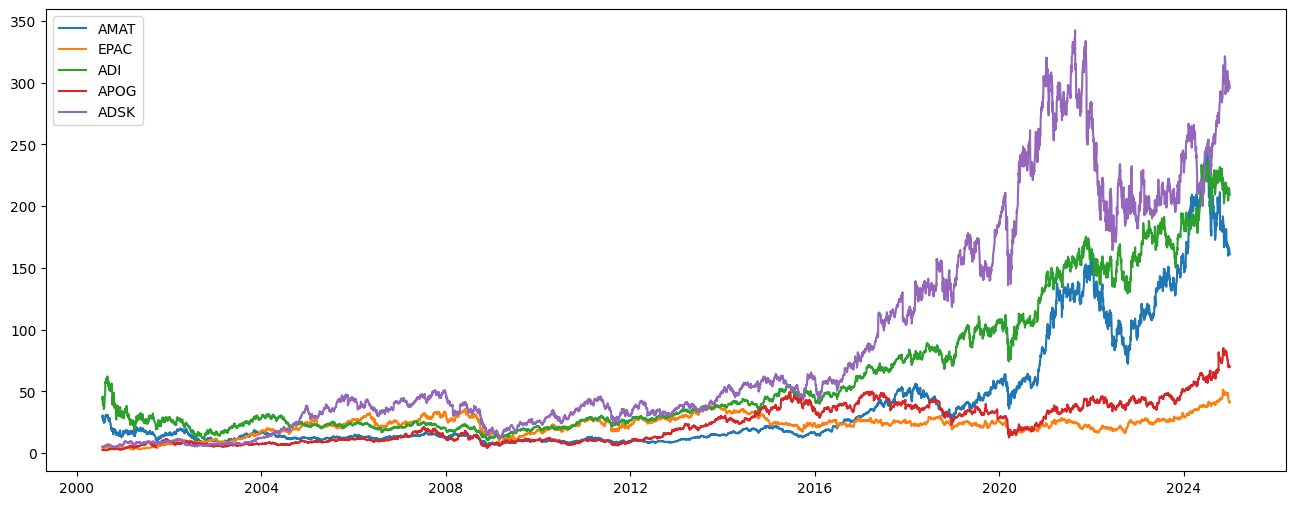

In [3]:
plt.figure(figsize=(16, 6))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.legend()
plt.show()


In [4]:

# Suppose 100,000 invested in the portfolio
investment = 100000
investment_per_stock = investment / len(data.columns)

portfolio_value = data / data.iloc[0] * investment_per_stock
portfolio_value["Total Value"] = portfolio_value.sum(axis = 1)
portfolio = portfolio_value.copy()

,AMAT,EPAC,ADI,APOG,ADSK
Date,,,,,
2000-07-24,0.200000,0.200000,0.200000,0.200000,0.200000
2000-07-25,0.211511,0.176311,0.211750,0.205879,0.194550
2000-07-26,0.210512,0.181105,0.204798,0.211476,0.192108
2000-07-27,0.201661,0.184319,0.194691,0.218452,0.200876
2000-07-28,0.205000,0.167255,0.200315,0.223007,0.204423
...,...,...,...,...,...
2024-12-24,0.055254,0.084802,0.047477,0.260496,0.551971
2024-12-26,0.054905,0.084240,0.047402,0.264018,0.549435
2024-12-27,0.055215,0.083487,0.047641,0.263703,0.549953


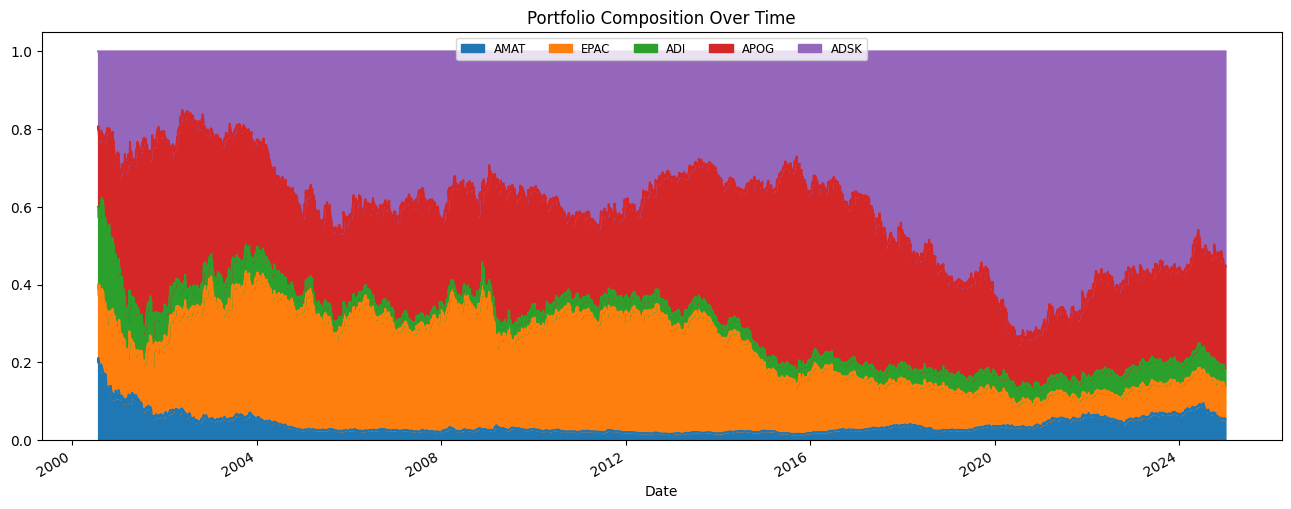

In [5]:
# tracking the value of the portfolio
for stock in portfolio_value.columns:
    if stock != "Total Value":
        # to visualize how your portfolio's composition changes over time
        portfolio_value[stock] = portfolio_value[stock] / portfolio_value["Total Value"]

portfolio_value.drop(columns=["Total Value"], inplace=True)
# Generate the plot
ax = portfolio_value.plot.area(figsize=(16, 6), title="Portfolio Composition Over Time")
# Move legend to the top
ax.legend(
    loc='upper center', 
    ncol=5,                      # Puts the 5 stocks in one row
    fontsize='small'
)

portfolio_value

- Biggest Winnder to be Autodesk, Inc. (ADSK), portfolio composition went from 20% in 2000 to 55% in 2024
- Stocks such as AMAT and APAC have shrinked drastically in terms of the portfolio composition

In [6]:
sp_data = yf.download("SPY", start="2000-07-24", end="2024-12-31")["Close"]
sp_data["Value"] = sp_data / sp_data.iloc[0] * investment
sp_data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,SPY,Value
Date,,
2000-07-24,92.956360,100000.000000
2000-07-25,93.253090,100319.214352
2000-07-26,92.343117,99340.289245
2000-07-27,92.026596,98999.784635
2000-07-28,89.949463,96765.259551
...,...,...
2024-12-23,587.787537,632326.327629
2024-12-24,594.320801,639354.640882
2024-12-26,594.360352,639397.188570


In [7]:
def calculate_cagr(initial_investment, final_value, years):
    return (final_value / initial_investment) ** (1 / years) - 1


In [8]:
# in terms of the return:
final_portfolio_value = portfolio.iloc[-1, :]["Total Value"]
final_sp_value = sp_data.iloc[-1, :]["Value"]
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Final S&P 500 Value: {final_sp_value}")
# Calculate the return
portfolio_return = (final_portfolio_value / investment - 1) * 100

print(f"Total Portfolio Return: {portfolio_return :.2f}%")
sp_return = (final_sp_value / investment - 1) * 100
# Calculate the annualized return (CAGR)
annualized_portfolio_return = calculate_cagr(investment, final_portfolio_value, 24.5) * 100
print(f"Annualized Portfolio Return (CAGR): {annualized_portfolio_return :.2f}%")
annualized_sp_return = calculate_cagr(investment, final_sp_value, 24.5) * 100
print(f"Annualized S&P 500 Return (CAGR): {annualized_sp_return :.2f}%")

# generated annual alpha
alpha = annualized_portfolio_return - annualized_sp_return
print(f"Annual Alpha: {alpha :.2f}%")


Final Portfolio Value: 2031314.1783954173
Final S&P 500 Value: 625446.7999608666
Total Portfolio Return: 1931.31%
Annualized Portfolio Return (CAGR): 13.08%
Annualized S&P 500 Return (CAGR): 7.77%
Annual Alpha: 5.31%


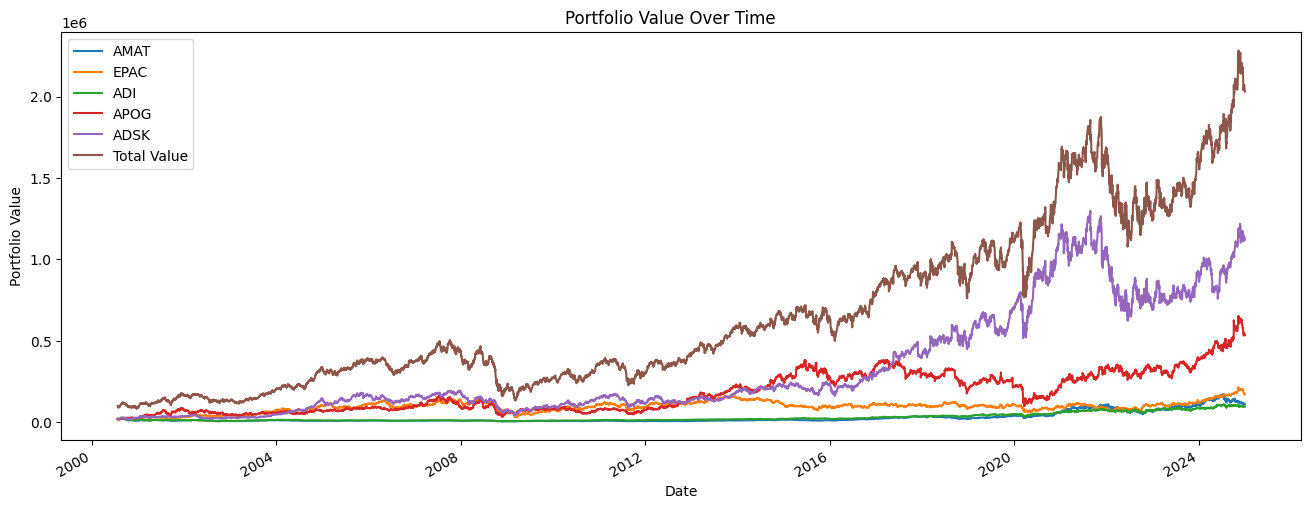

In [9]:
plt.figure(figsize=(16, 6))
portfolio.iloc[:, :].plot(ax = plt.gca())
plt.title("Portfolio Value Over Time    ")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend(loc="upper left")
plt.show()